# Explorando os dados para a atividade do Módulo 2

---

Dados do [Kagle](https://www.kaggle.com/rikdifos/credit-card-approval-prediction) para Credit Card Score.



## Metodologia CRISP-DM


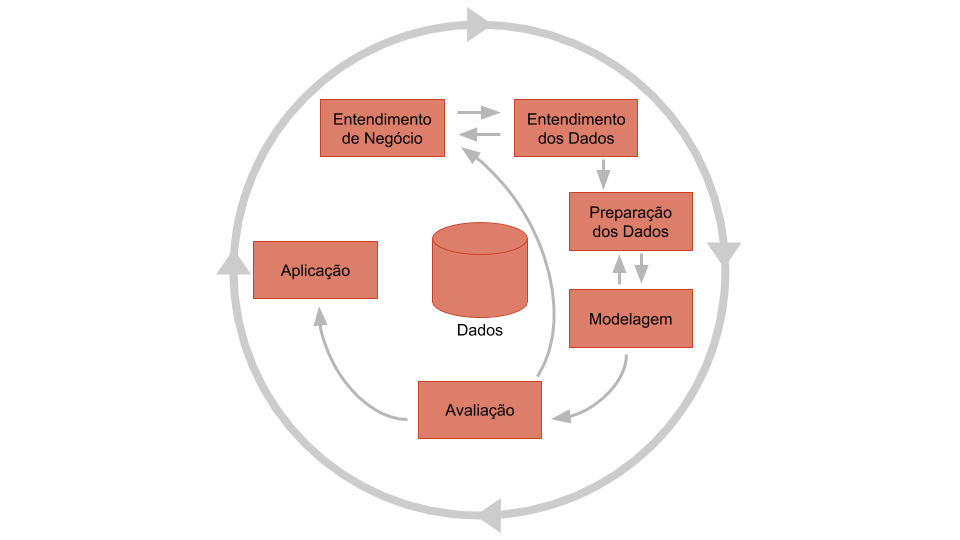

In [1]:
import pandas as pd
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as srn
import plotly
import plotly.express as px

In [7]:
df = pd.read_csv('demo01.csv')
print(df.shape)
df.head()

(16650, 16)


,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
3,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
4,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False


## Dicionário de dados

| Variable Name            | Description                                         | Tipo  |
| ------------------------ |:---------------------------------------------------:| -----:|
| sexo| M = 'Masculino'; F = 'Feminino' |M/F|
| posse_de_veiculo| Y = 'possui'; N = 'não possui' |Y/N|
| posse_de_imovel| Y = 'possui'; N = 'não possui' |Y/N|
| qtd_filhos| Quantidade de filhos |inteiro|
| tipo_renda|Tipo de renda (ex: assaliariado, autônomo etc) | texto |
| educacao| Nível de educação (ex: secundário, superior etc) |texto|
| estado_civil | Estado civil (ex: solteiro, casado etc)| texto |
| tipo_residencia | tipo de residência (ex: casa/apartamento, com os pais etc) | texto |
| idade | idade em anos |inteiro|
| tempo de emprego | tempo de emprego em anos |inteiro|
| possui_celular | Indica se possui celular (1 = sim, 0 = não) |binária|
| possui_fone_comercial | Indica se possui telefone comercial (1 = sim, 0 = não) |binária|
| possui_fone | Indica se possui telefone (1 = sim, 0 = não) |binária|
| possui_email | Indica se possui e-mail (1 = sim, 0 = não) |binária|
| qt_pessoas_residencia | quantidade de pessoas na residência |inteiro|
| **mau** | indicadora de mau pagador (True = mau, False = bom) |binária|

In [6]:
print(df.info())
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   16650 non-null  object 
 1   posse_de_veiculo       16650 non-null  object 
 2   posse_de_imovel        16650 non-null  object 
 3   qtd_filhos             16650 non-null  int64  
 4   tipo_renda             16650 non-null  object 
 5   educacao               16650 non-null  object 
 6   estado_civil           16650 non-null  object 
 7   tipo_residencia        16650 non-null  object 
 8   idade                  16650 non-null  float64
 9   tempo_emprego          16650 non-null  float64
 10  possui_celular         16650 non-null  int64  
 11  possui_fone_comercial  16650 non-null  int64  
 12  possui_fone            16650 non-null  int64  
 13  possui_email           16650 non-null  int64  
 14  qt_pessoas_residencia  16650 non-null  float64
 15  ma

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
count,16650,16650,16650,16650.000000,16650,16650,16650,16650,16650.000000,16650.000000,16650.0,16650.000000,16650.000000,16650.000000,16650.000000,16650
unique,2,2,2,NaN,5,5,5,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,F,N,Y,NaN,Working,Secondary / secondary special,Married,House / apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,11201,10178,11176,NaN,8565,11245,11680,14974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16260
mean,NaN,NaN,NaN,0.433153,NaN,NaN,NaN,NaN,44.319513,-161.416446,1.0,0.225225,0.295676,0.088889,2.211892,NaN
std,NaN,NaN,NaN,0.739395,NaN,NaN,NaN,NaN,11.228837,376.843912,0.0,0.417743,0.456360,0.284592,0.903755,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,22.030137,-1000.665753,1.0,0.000000,0.000000,0.000000,1.000000,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,34.873973,1.183562,1.0,0.000000,0.000000,0.000000,2.000000,NaN
50%,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,43.493151,4.691781,1.0,0.000000,0.000000,0.000000,2.000000,NaN
75%,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,53.410959,9.088356,1.0,0.000000,1.000000,0.000000,3.000000,NaN
